In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('PEP1.csv',index_col=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1.a) Identify the shape of the dataset

In [3]:
data.shape

(1460, 80)

# 1.b) Identify variables with null value

In [4]:
for i in data.columns:
    if data[i].isna().sum()>0:
        print(i,data[i].isna().sum())
        print()

LotFrontage 259

Alley 1369

MasVnrType 8

MasVnrArea 8

BsmtQual 37

BsmtCond 37

BsmtExposure 38

BsmtFinType1 37

BsmtFinType2 38

Electrical 1

FireplaceQu 690

GarageType 81

GarageYrBlt 81

GarageFinish 81

GarageQual 81

GarageCond 81

PoolQC 1453

Fence 1179

MiscFeature 1406



# 1.c) Identify variable with unique values

In [5]:
for i in data.columns:
    print(i,data[i].unique())
    print()

MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']

LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

LotArea [ 8450  9600 11250 ... 17217 13175  9717]

Street ['Pave' 'Grvl']

Alley [nan 'Grvl' 'Pave']

LotShape ['Reg' 'IR1' 'IR2' 'IR3']

LandContour ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities ['AllPub' 'NoSeWa']

LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope ['Gtl' 'Mod' 'Sev']

Neighborhood ['

# 2. Generating a separate dataset for numerical and categorical variables

In [6]:
numeric_data=data.select_dtypes(include=[np.number])
#numeric_data.to_csv('NumericData.csv',index=False)
numeric_data.shape

(1460, 37)

In [7]:
categorical_data=data.select_dtypes(exclude=[np.number])
#categorical_data.to_csv('CategoricalData.csv',index=False)
categorical_data.shape

(1460, 43)

# 3.a) Missing value treatment

In [8]:
for i in numeric_data.columns:
    if numeric_data[i].isna().sum()>0:
        print(i,data[i].isna().sum())
        print()

LotFrontage 259

MasVnrArea 8

GarageYrBlt 81



In [9]:
numeric_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
percentage_of_missing_values = (numeric_data['GarageYrBlt'].isna().sum()/numeric_data.shape[0])*100
percentage_of_missing_values

5.5479452054794525

Observations:- GarageYrBlt have null value where GarageArea is also 0. 

Inference:- As GarageYrBlt contains years variables so replacing it with 0  as in there is no GarageArea is present in that                 year.  

In [11]:
numeric_data.GarageYrBlt.fillna(0,inplace=True)

In [12]:
percentage_of_missing = (numeric_data['LotFrontage'].isna().sum()/numeric_data.shape[0])*100
percentage_of_missing

17.73972602739726

2.163569142324884

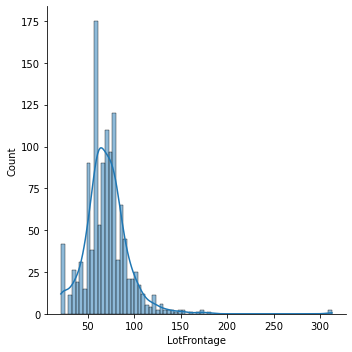

In [13]:
sns.displot(numeric_data.LotFrontage,kde=True)
numeric_data['LotFrontage'].skew()

In [14]:
numeric_data.LotFrontage.fillna(numeric_data.LotFrontage.median(),inplace=True)
numeric_data.LotFrontage.head()

Id
1    65.0
2    80.0
3    68.0
4    60.0
5    84.0
Name: LotFrontage, dtype: float64

Observation:- The data set for LotFrontage is rightly screwed and it is of float datatype.

Replacing the null value LotFrontage with median.

In [15]:
percentage_of_missing = (numeric_data['MasVnrArea'].isna().sum()/numeric_data.shape[0])*100
percentage_of_missing

0.547945205479452

2.669084210182863

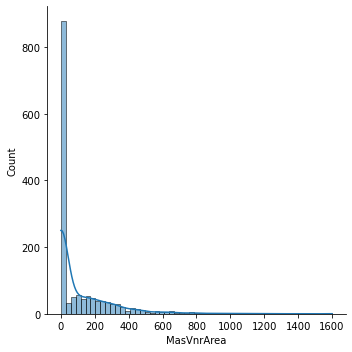

In [16]:
sns.displot(numeric_data.MasVnrArea,kde=True)
numeric_data['MasVnrArea'].skew()

In [17]:
numeric_data.MasVnrArea.fillna(0,inplace=True)
numeric_data.MasVnrArea.head()

Id
1    196.0
2      0.0
3    162.0
4      0.0
5    350.0
Name: MasVnrArea, dtype: float64

Replacing the MasVnrArea the null value with median.

In [18]:
for i in numeric_data.columns:
    if numeric_data[i].isna().sum()>0:
        print(i,data[i].isna().sum())
        print()

Observation:- Running a for loop to check if numeric dataframe contains any null value or not.

Inference:- We found no null value for numeric data

# 4.a) Missing Value for Categorical data

In [19]:
# Identifying all the variables which contain missing values
category_df_stats = pd.DataFrame(columns = ['column','num_miss', 'pct_miss'])

na_data = pd.DataFrame()

for c in categorical_data.columns:
    na_data['column'] = [c]
    na_data['num_miss'] = categorical_data[c].isnull().sum()
    na_data['pct_miss'] = (categorical_data[c].isnull().sum()/len(categorical_data)).round(3)*100
    category_df_stats = category_df_stats.append(na_data)
    
category_df_stats

,column,num_miss,pct_miss
0,MSZoning,0,0.0
0,Street,0,0.0
0,Alley,1369,93.8
0,LotShape,0,0.0
0,LandContour,0,0.0
0,Utilities,0,0.0
0,LotConfig,0,0.0
0,LandSlope,0,0.0
0,Neighborhood,0,0.0
0,Condition1,0,0.0


Inference:

Variables with a large percentage of missing values are identified. Let us drop them from the dataset.

List of variables with large number of missing values:

MiscFeature
Fence
PoolQC
FireplaceQu
Alley

In [20]:
categorical_data.drop(['MiscFeature', 'Fence', 'PoolQC','FireplaceQu','Alley'], axis=1, inplace=True)
  
categorical_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functiol,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [21]:
# Identifying all the variables which contain missing values
category_df_stats = pd.DataFrame(columns = ['column','num_miss', 'pct_miss'])

na_data = pd.DataFrame()

for c in categorical_data.columns:
    na_data['column'] = [c]
    na_data['num_miss'] = categorical_data[c].isnull().sum()
    na_data['pct_miss'] = (categorical_data[c].isnull().sum()/len(categorical_data)).round(3)*100
    category_df_stats = category_df_stats.append(na_data)
    
category_df_stats

,column,num_miss,pct_miss
0,MSZoning,0,0.0
0,Street,0,0.0
0,LotShape,0,0.0
0,LandContour,0,0.0
0,Utilities,0,0.0
0,LotConfig,0,0.0
0,LandSlope,0,0.0
0,Neighborhood,0,0.0
0,Condition1,0,0.0
0,Condition2,0,0.0


Inference:- Replacing the null value for BsmtQual, BsmtCond,BsmtExposure, BsmtFinType1,BsmtFinType2 as given in the data dicitionary for None as NA

In [22]:
values = {'BsmtQual': 'NA', 'BsmtCond': 'NA', "BsmtExposure": "NA", "BsmtFinType1": "NA",'BsmtFinType2':"NA"}
categorical_data.fillna(value=values,inplace=True)


In [23]:
categorical_data.BsmtFinType1.head(19)

Id
1     GLQ
2     ALQ
3     GLQ
4     ALQ
5     GLQ
6     GLQ
7     GLQ
8     ALQ
9     Unf
10    GLQ
11    Rec
12    GLQ
13    ALQ
14    Unf
15    BLQ
16    Unf
17    ALQ
18     NA
19    GLQ
Name: BsmtFinType1, dtype: object

In [24]:
categorical_data.MasVnrType.fillna('None',inplace=True)


Replacing the missing value for MasVnrType with None as given in the data dictionary

In [25]:
categorical_data.Electrical.mode()

0    SBrkr
Name: Electrical, dtype: object

In [26]:
categorical_data.Electrical.fillna(categorical_data.Electrical.mode()[0],inplace=True)

Infernce:- REplace the missing value for Electrical column with mode as 1 value is missing

In [27]:
values = {"GarageType":"NA","GarageFinish":"NA","GarageQual":"NA","GarageCond":"NA"}
categorical_data.fillna(value=values,inplace=True)


Replacing the values for GaragType, GarageFinish, GarageQual, GarageCond with NA as given in the data dictionary

In [28]:
# Identifying all the variables which contain missing values
category_df_stats = pd.DataFrame(columns = ['column','num_miss', 'pct_miss'])

na_data = pd.DataFrame()

for c in categorical_data.columns:
    na_data['column'] = [c]
    na_data['num_miss'] = categorical_data[c].isnull().sum()
    na_data['pct_miss'] = (categorical_data[c].isnull().sum()/len(categorical_data)).round(3)*100
    category_df_stats = category_df_stats.append(na_data)
    
category_df_stats

,column,num_miss,pct_miss
0,MSZoning,0,0.0
0,Street,0,0.0
0,LotShape,0,0.0
0,LandContour,0,0.0
0,Utilities,0,0.0
0,LotConfig,0,0.0
0,LandSlope,0,0.0
0,Neighborhood,0,0.0
0,Condition1,0,0.0
0,Condition2,0,0.0


Again checking for any missing values 

In [29]:

print('-------------')
print(categorical_data.shape)

-------------
(1460, 38)


In [30]:
categorical_data.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functiol,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


# 3. B)	Identify the skewness and distribution

In [31]:
numeric_data.skew()

MSSubClass        1.407657
LotFrontage       2.409147
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchebvGr        4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -3.869501
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

In [32]:
numeric_data['SalePrice'].skew()

1.8828757597682129

# 3.c)Identify significant variables using a correlation matrix 

In [33]:
numeric_data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


 Plotting the heatmap for the correlation matrix

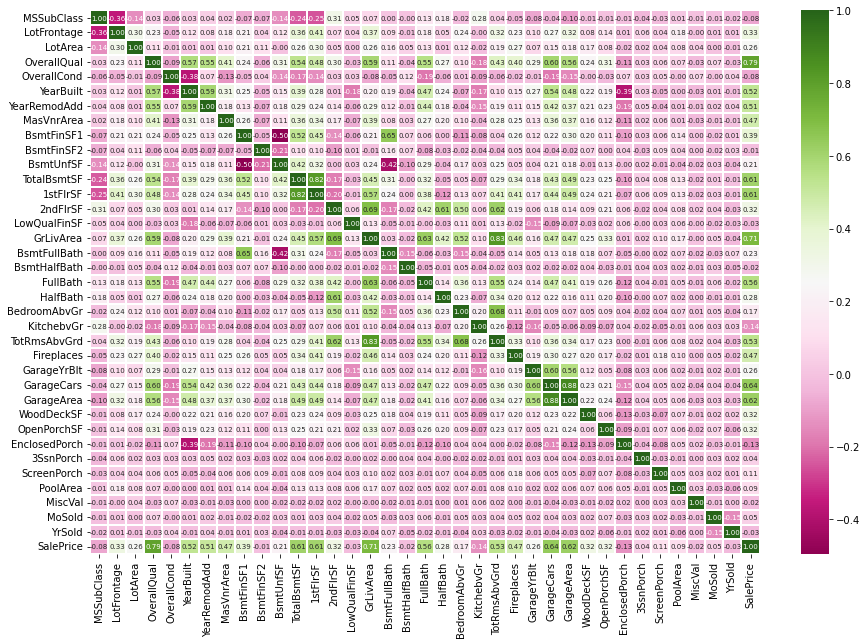

In [34]:
plt.figure(figsize = (15,10))
sns.heatmap(numeric_data.corr(),annot = True, annot_kws= {'size' : 7},
           cmap = "PiYG", fmt = '.2f', linewidths = 2, linecolor = 'white');

In [35]:
numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [36]:
from scipy.stats import pearsonr

significant_columns = []
for column in numeric_data.columns:
    if(column != 'SalePrice'):
        corr,p = pearsonr(numeric_data.SalePrice, numeric_data[column])
        if((corr >= 0.5) | (corr <= -0.5)):
            print(column , corr, p)
            significant_columns.append(column)


OverallQual 0.7909816005838048 2.185675268e-313
YearBuilt 0.5228973328794969 2.9902290990158995e-103
YearRemodAdd 0.5071009671113862 3.1649482419200737e-96
TotalBsmtSF 0.6135805515591953 9.484229391507914e-152
1stFlrSF 0.6058521846919146 5.394710618971284e-147
GrLivArea 0.7086244776126521 4.518033646779945e-223
FullBath 0.5606637627484459 1.2364700667610025e-121
TotRmsAbvGrd 0.5337231555820281 2.772280932958432e-108
GarageCars 0.6404091972583521 2.4986441671792262e-169
GarageArea 0.6234314389183616 5.2650381679802e-158


Considering 0.5 and -0.5 as threshold values for Correlation value. To identify the significant numerical variables with the help of correlation value we are considering those varibale whose correlation values greater than or equal to 0.5 and less than -0.5 or equal to that 

# 3. d)	Pair plot for distribution and density

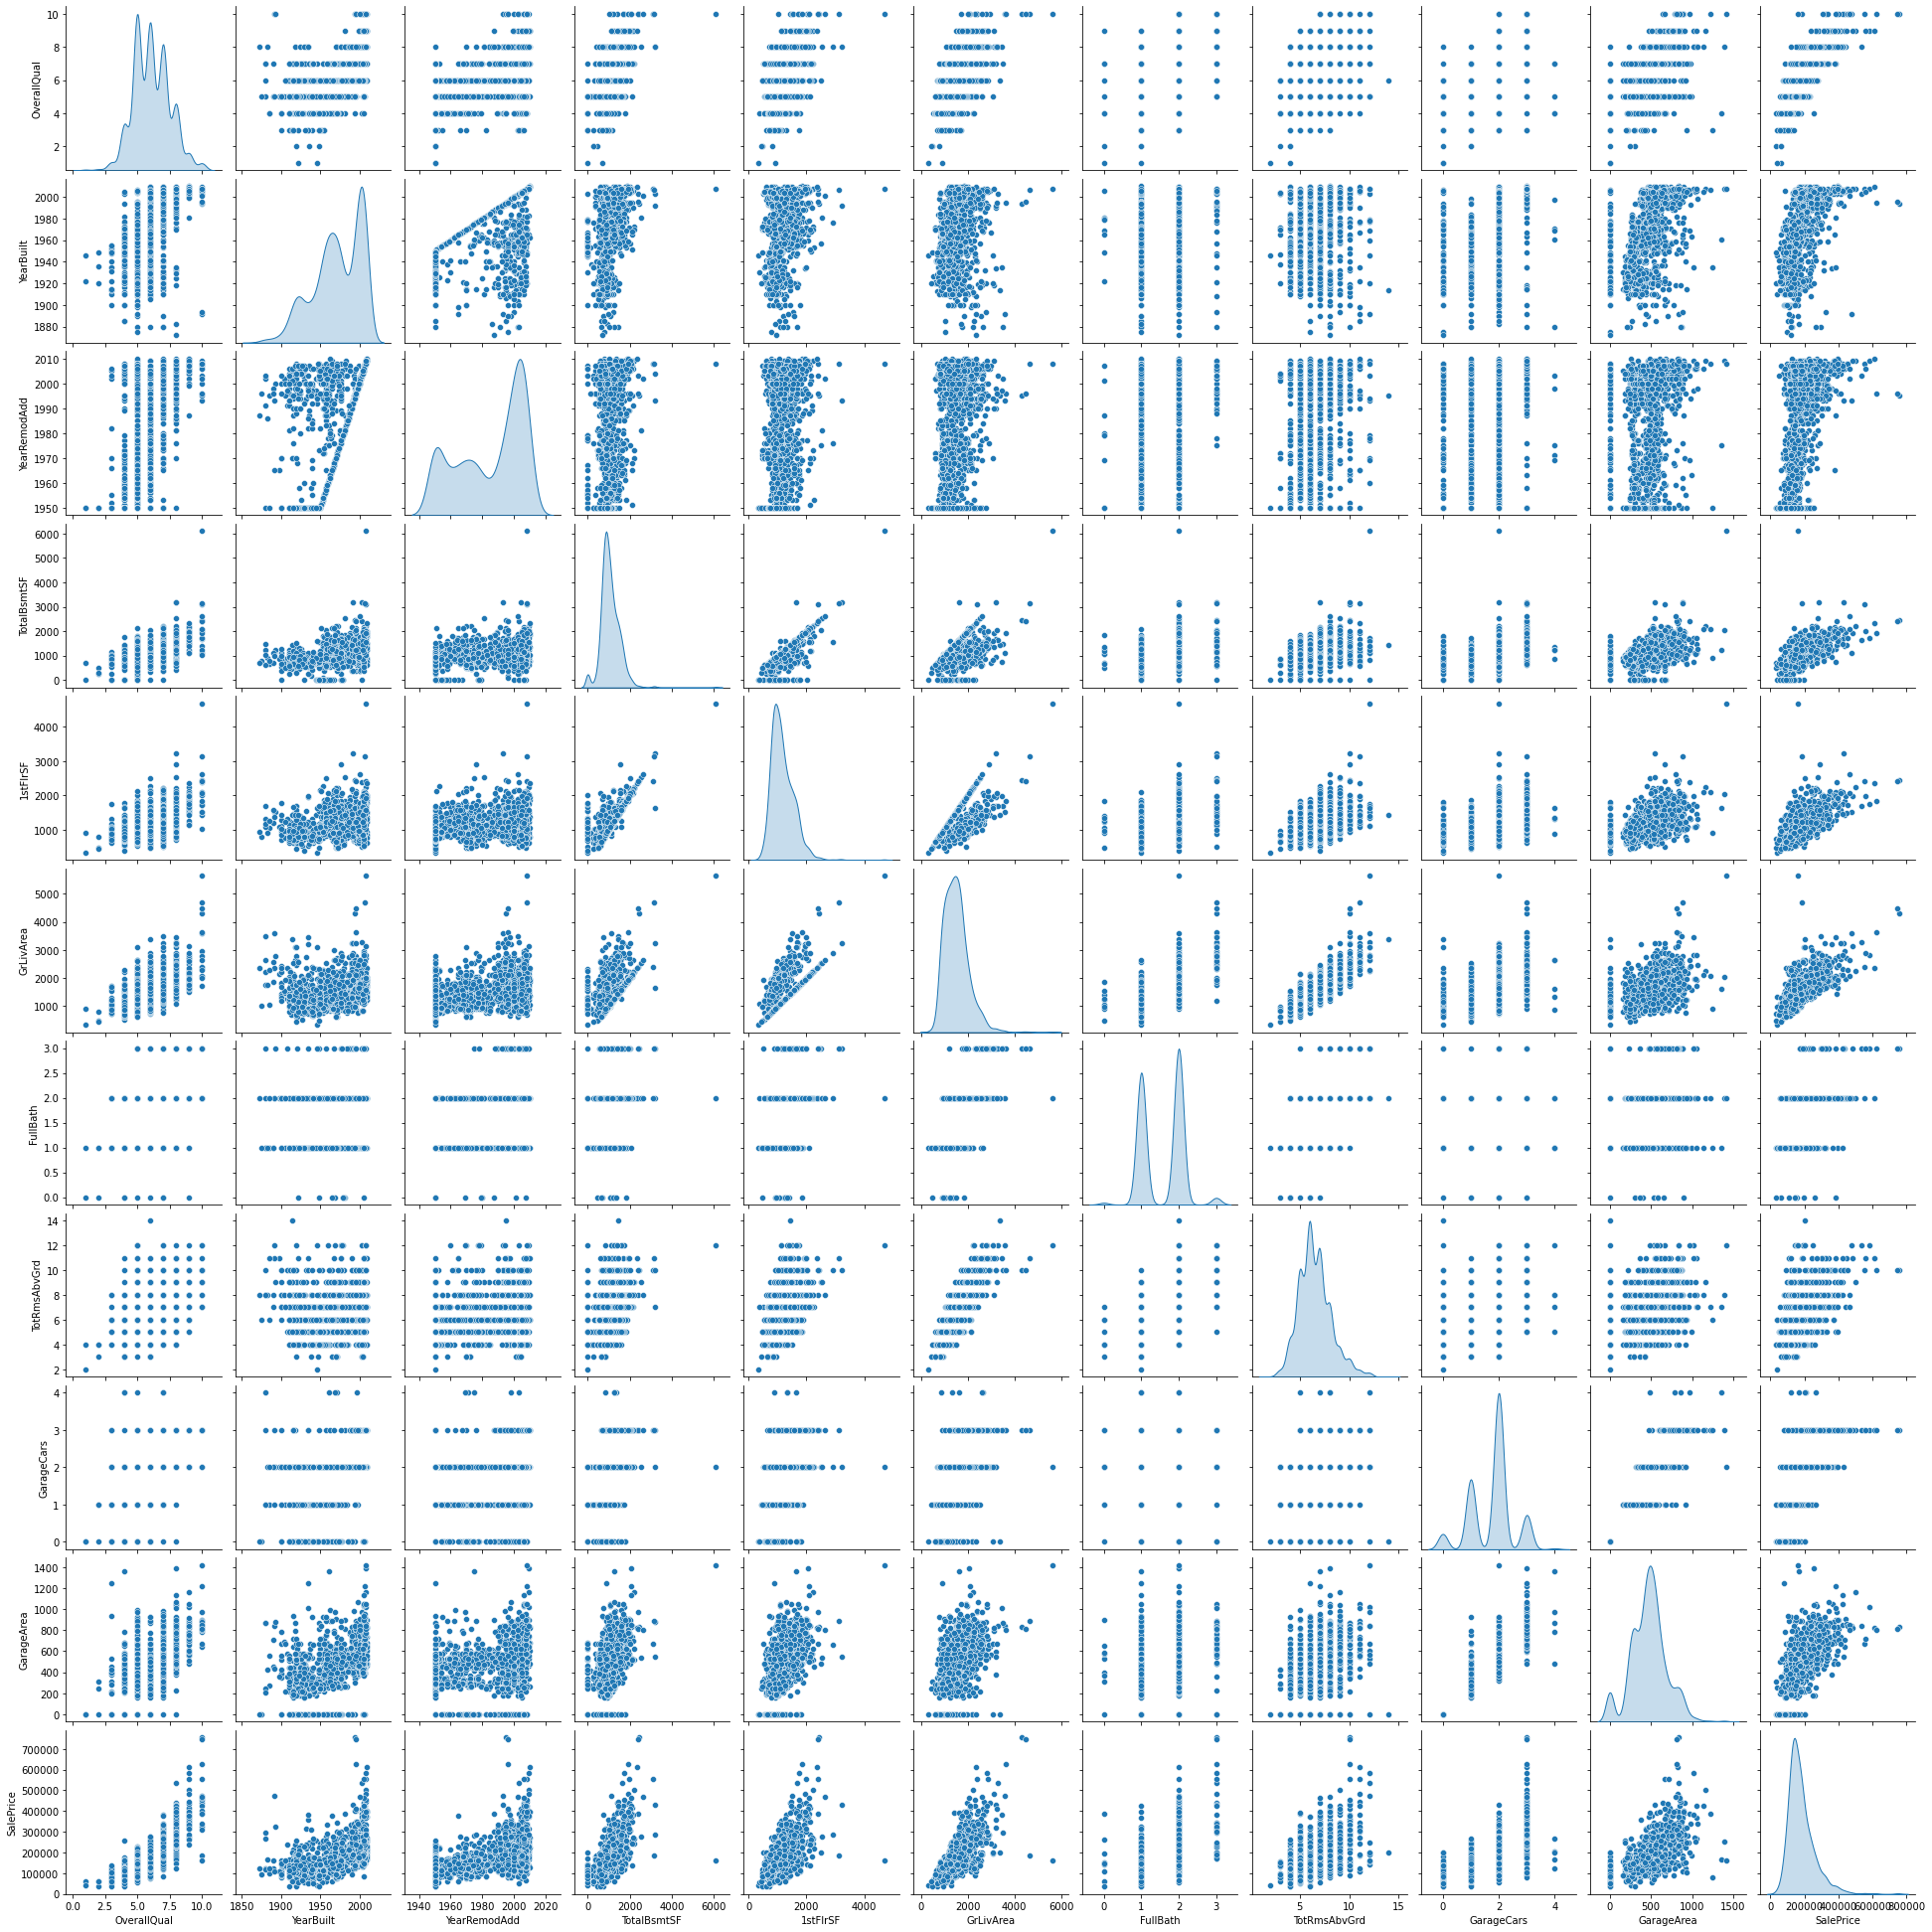

In [37]:
sns.pairplot(numeric_data, vars = [ 'OverallQual', 'YearBuilt', 'YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath', 'TotRmsAbvGrd','GarageCars','GarageArea','SalePrice'], diag_kind="kde");

Observation:- 
    i) SalePrice vs OverallQual:- As OverallQual increases sale price also increased.
    
    ii) YearBuilt vs SalePrice:- With Year salePrice increases.
    
    
    iv)SalePrice vs TotalBsmtSF:- SalePrice increases with TotalBsmtSF upto 2000 TotalBsmtSF.
    
    
    vi)SalePrice vs GrLivArea:- SalePrice increases with Ground Living area square foot increases.
    
    vii)SalePrice vs GarageCars:- With GarageCars increases SalePrice increases. 

# 4. b) Count plot and box plot for bivariate analysis

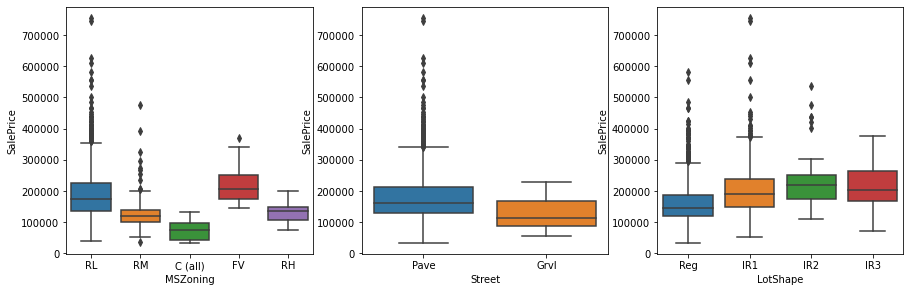

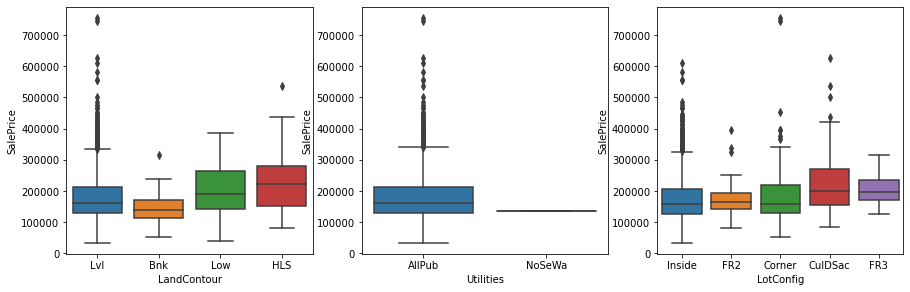

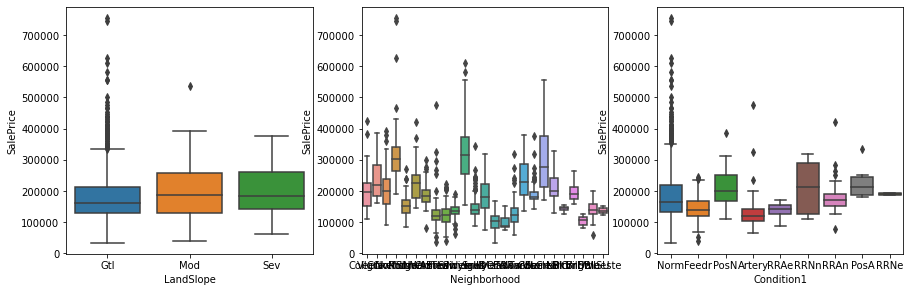

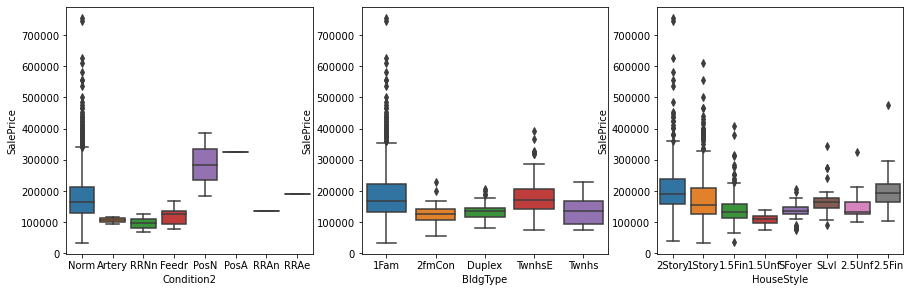

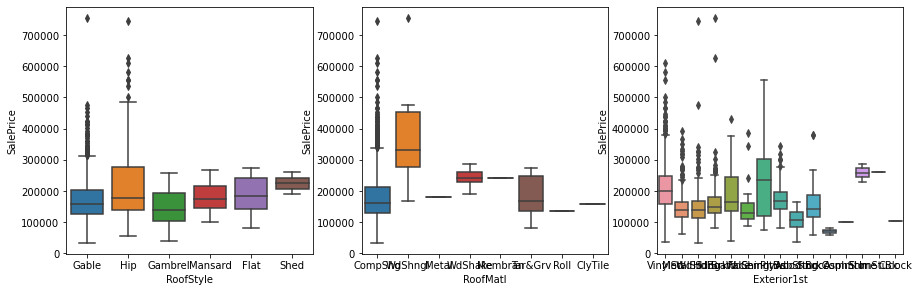

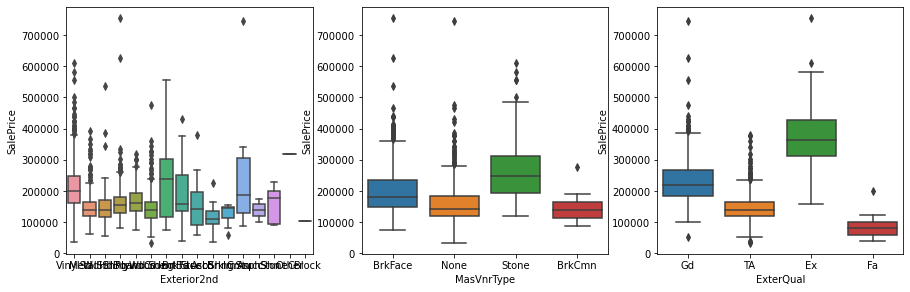

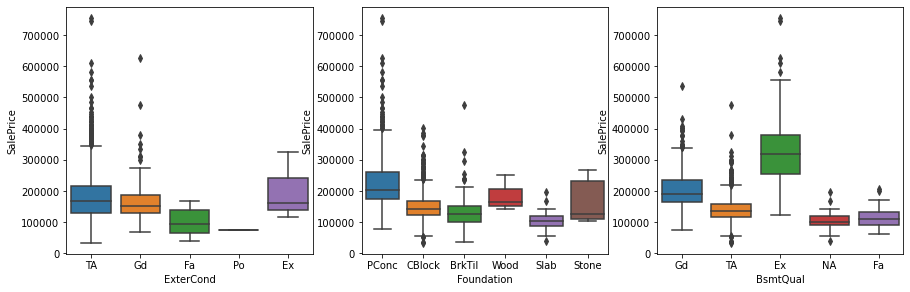

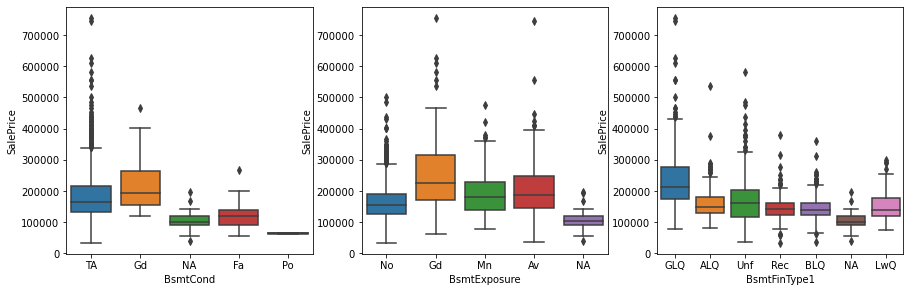

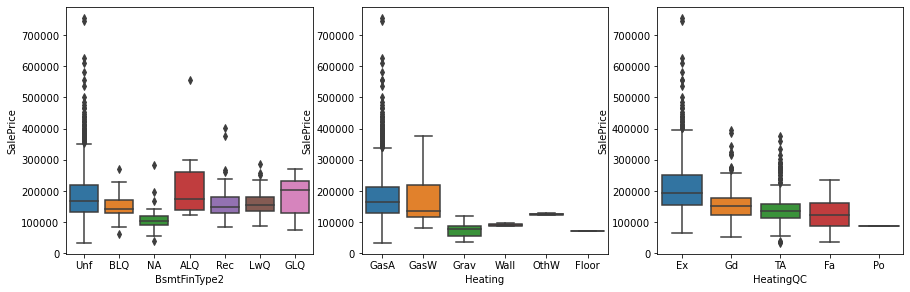

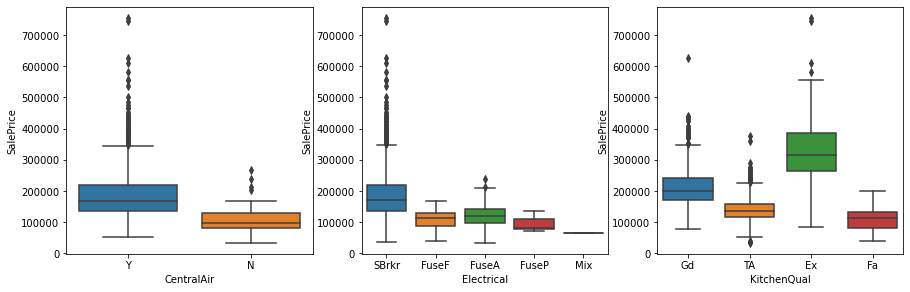

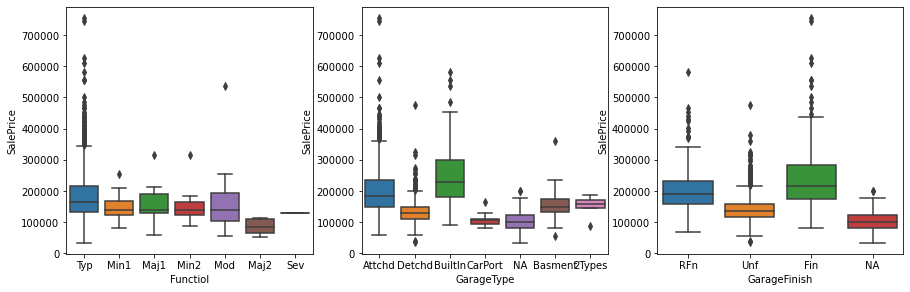

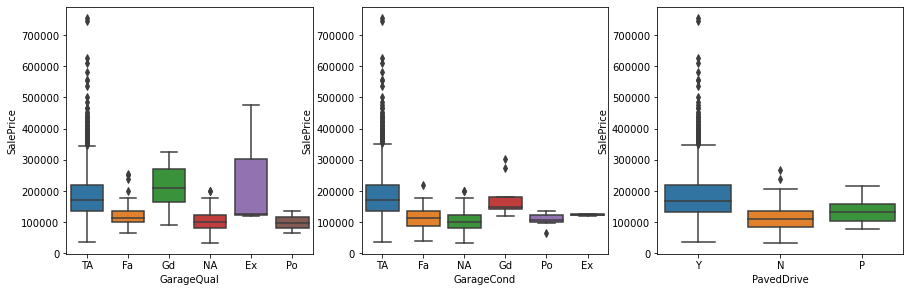

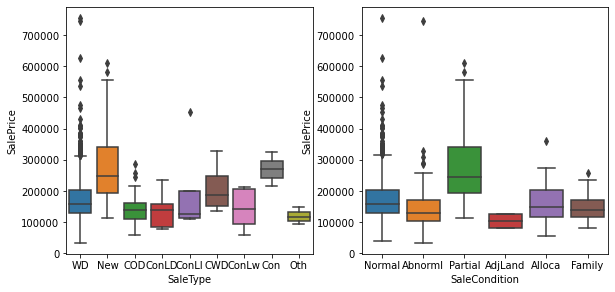

In [38]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(categorical_data.columns):
    if ix <= 3:
        ax2 = fig.add_subplot(2,3,ix+3)
        sns.boxplot(data=categorical_data, x=categorical_data[c], y=numeric_data.SalePrice, ax=ax2) #for boxplot
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1


# for i in categorical_data:
#     plt.figure(figsize=(8,4))
#     sns.countplot(x=categorical_data[i],palette = 'Set2')

#Observations:-

   i)Street- The SalePrice is higher in case Pave type street compare to Grvl. Therefore SalePrice is dependent on street type. 
   
   ii)MsZoning:- The SalePrice is higher for RL and FV compare to other types for MsZoning. Therefore SalePrice is dependent on MsZoning.
   
   iii) BldType:- Here 1Fam is higher than other type of BldgType . Saleprice is dependent on BldType.
   
   iv) KitchenQual:- Here the kitchen SalePrice is higher where KitchenQual is excellent. Therefore SalePrice is dependent on KitchenQual.
   
   v) GarageFinish:- Here the SalePrice is higher where the GarageFinish type is Finished. Therefore SalPrice is dependent on GarageFinish.
   
   
   vi) SaleType:- Here the SalePrice increases where the SaleType is new. Therefor SalePrice is dependent on SaleType. 
   

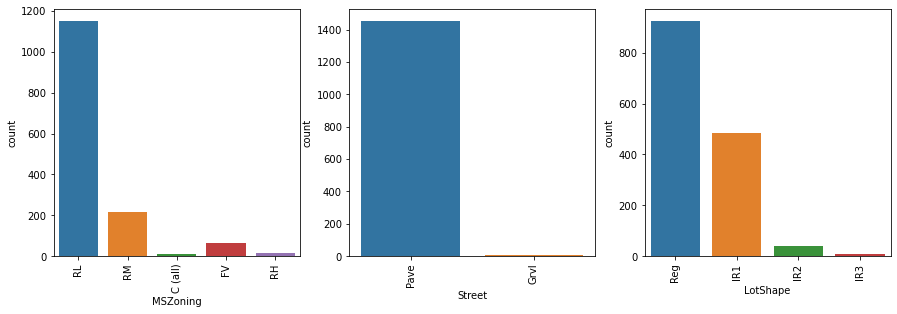

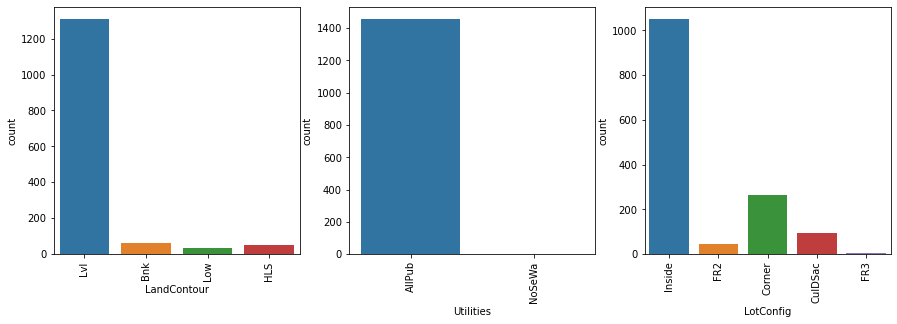

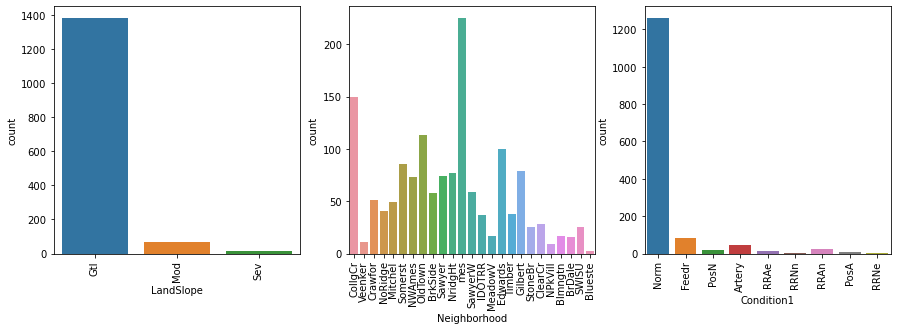

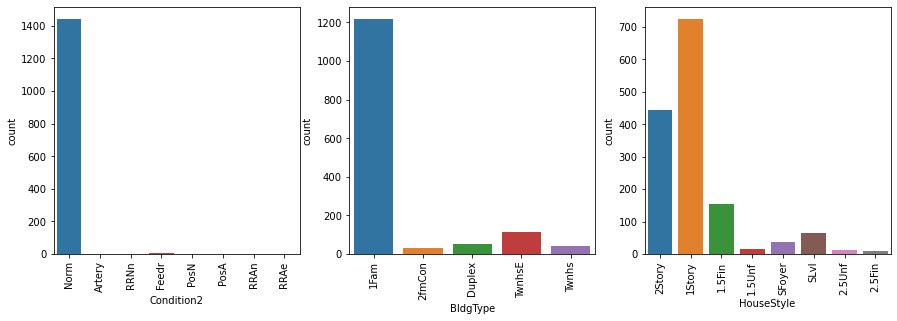

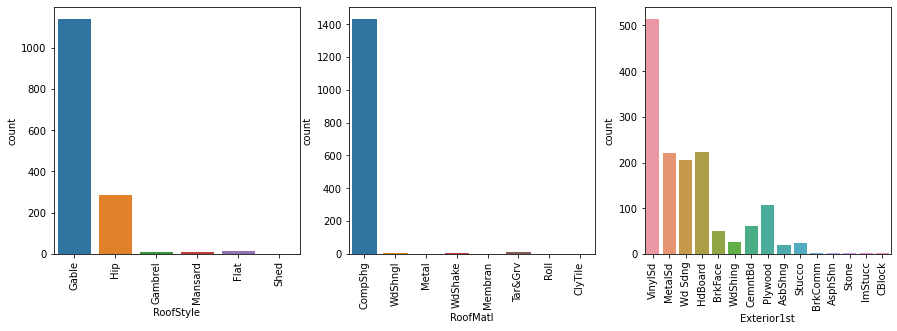

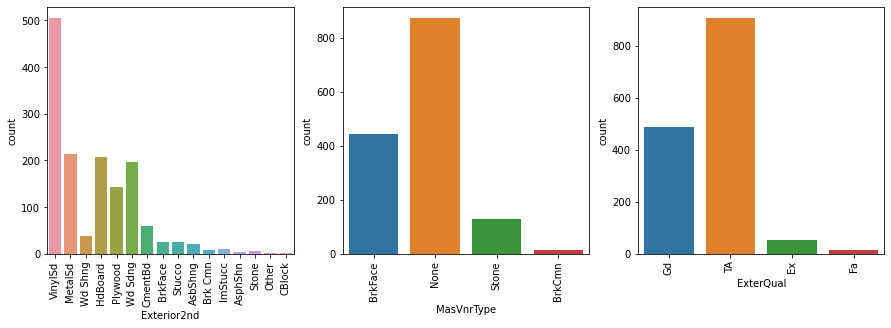

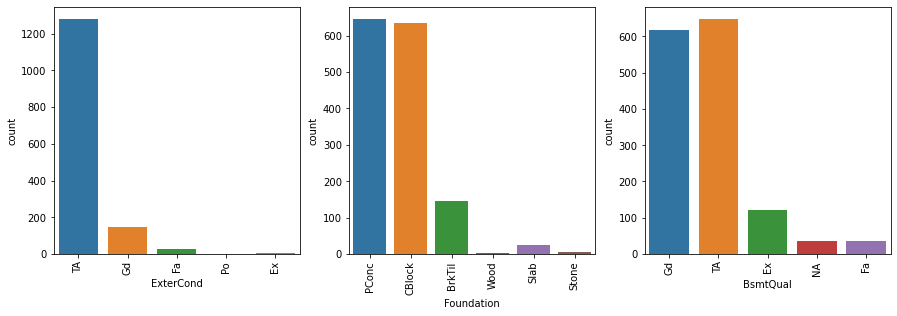

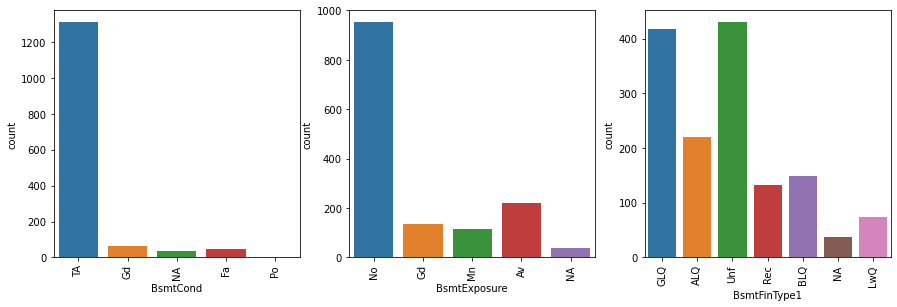

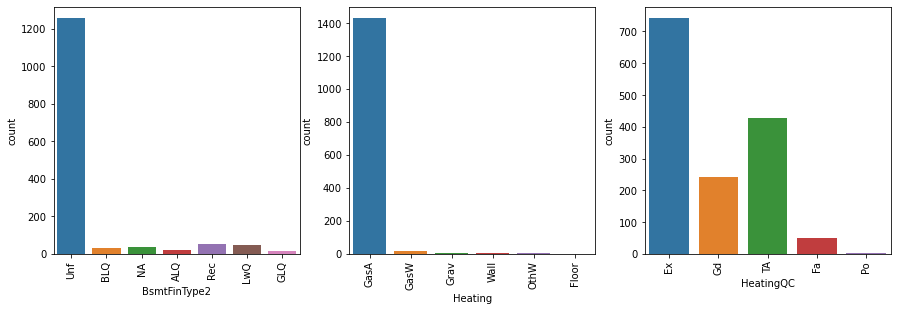

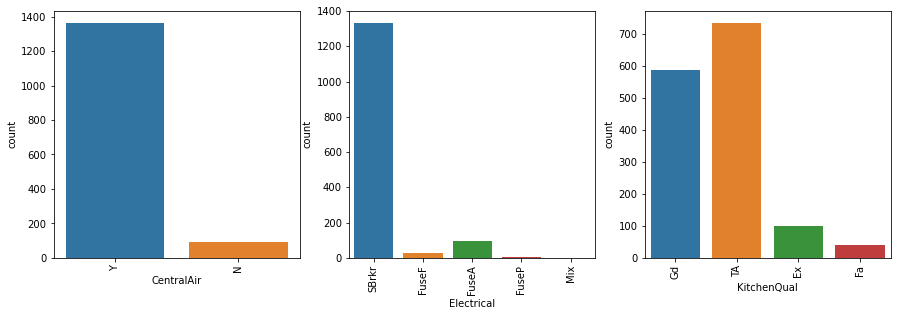

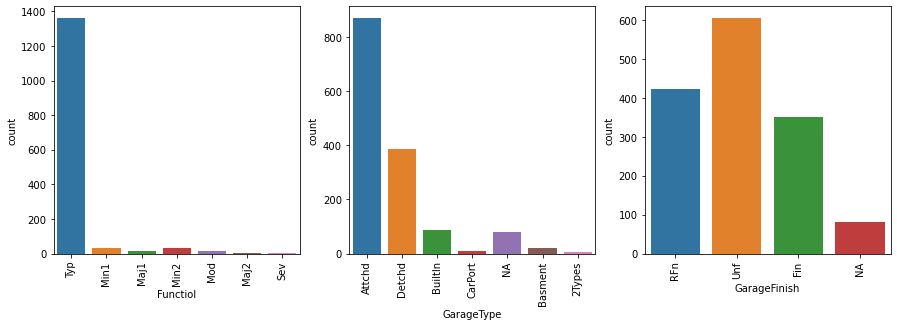

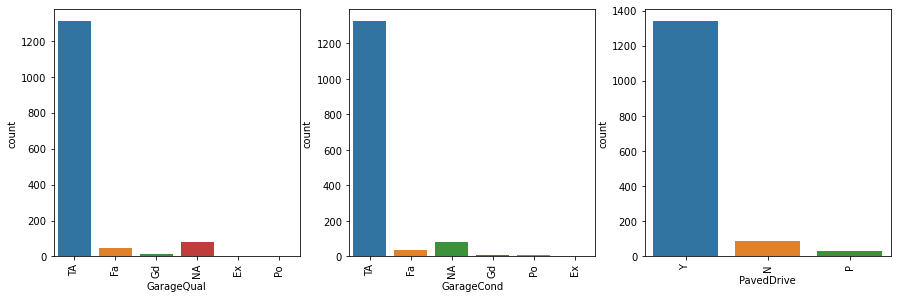

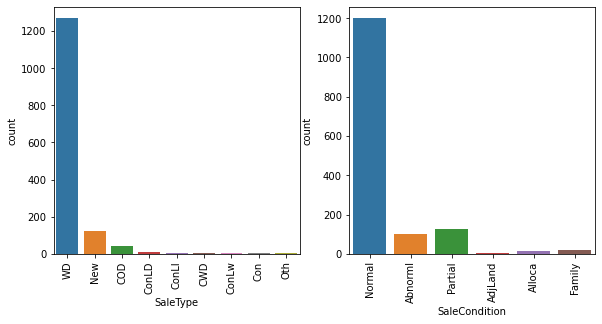

In [39]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(categorical_data.columns):
    if ix <= 3:
        ax2 = fig.add_subplot(2,3,ix+3)
        ax2.tick_params(axis='x', labelrotation=90)
        sns.countplot(data=categorical_data, x=categorical_data[c], ax=ax2) #for boxplot
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [40]:
categorical_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [41]:
categorical_data.shape

(1460, 38)

In [42]:
numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# 4. c.	Identify significant variables using p-values and Chi-Square values

In [43]:

import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
class ChiSquare:
#Function to determine p-value and perform chi-square test
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi-square Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None


#Function to print the results of p-value and chi-square test     
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
            imp_cat.append(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
        print(result)
#Function to determine chi-square and p-value less than or equal to 0.05
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = numeric_data[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

        
imp_cat=[]

#Initializing ChiSquare Class
cT = ChiSquare(categorical_data)
#Perform Feature Selection
testColumns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functiol', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
for var in testColumns:
    cT.TestIndependence(colX=var,colY='SalePrice')
    #print(var)

MSZoning is IMPORTANT for Prediction
Street is IMPORTANT for Prediction
LotShape is IMPORTANT for Prediction
LandContour is NOT an important predictor. (Discard LandContour from model)
Utilities is NOT an important predictor. (Discard Utilities from model)
LotConfig is IMPORTANT for Prediction
LandSlope is NOT an important predictor. (Discard LandSlope from model)
Neighborhood is IMPORTANT for Prediction
Condition1 is NOT an important predictor. (Discard Condition1 from model)
Condition2 is NOT an important predictor. (Discard Condition2 from model)
BldgType is NOT an important predictor. (Discard BldgType from model)
HouseStyle is NOT an important predictor. (Discard HouseStyle from model)
RoofStyle is NOT an important predictor. (Discard RoofStyle from model)
RoofMatl is NOT an important predictor. (Discard RoofMatl from model)
Exterior1st is NOT an important predictor. (Discard Exterior1st from model)
Exterior2nd is NOT an important predictor. (Discard Exterior2nd from model)
MasVnr

In [44]:
imp_cat

['MSZoning',
 'Street',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'Heating',
 'CentralAir',
 'KitchenQual',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

In [45]:
significant_columns

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

In [46]:

for i in numeric_data.columns:
        if i not in  significant_columns:
            if i!='SalePrice':
             numeric_data.drop(i,axis=1,inplace=True)

In [47]:
numeric_data

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
Id,,,,,,,,,,,
1,7,2003,2003,856,856,1710,2,8,2,548,208500
2,6,1976,1976,1262,1262,1262,2,6,2,460,181500
3,7,2001,2002,920,920,1786,2,6,2,608,223500
4,7,1915,1970,756,961,1717,1,7,3,642,140000
5,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1456,6,1999,2000,953,953,1647,2,7,2,460,175000
1457,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1458,7,1941,2006,1152,1188,2340,2,9,1,252,266500


In [48]:

for i in categorical_data.columns:
        if i not in  imp_cat:
            #print(i)
            categorical_data.drop(i,axis=1,inplace=True)

In [49]:
categorical_data

,MSZoning,Street,LotShape,LotConfig,Neighborhood,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,Heating,CentralAir,KitchenQual,GarageFinish,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Inside,CollgCr,BrkFace,Gd,TA,PConc,Gd,TA,No,GasA,Y,Gd,RFn,WD,Normal
2,RL,Pave,Reg,FR2,Veenker,None,TA,TA,CBlock,Gd,TA,Gd,GasA,Y,TA,RFn,WD,Normal
3,RL,Pave,IR1,Inside,CollgCr,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GasA,Y,Gd,RFn,WD,Normal
4,RL,Pave,IR1,Corner,Crawfor,None,TA,TA,BrkTil,TA,Gd,No,GasA,Y,Gd,Unf,WD,Abnorml
5,RL,Pave,IR1,FR2,NoRidge,BrkFace,Gd,TA,PConc,Gd,TA,Av,GasA,Y,Gd,RFn,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Inside,Gilbert,None,TA,TA,PConc,Gd,TA,No,GasA,Y,TA,RFn,WD,Normal
1457,RL,Pave,Reg,Inside,NWAmes,Stone,TA,TA,CBlock,Gd,TA,No,GasA,Y,TA,Unf,WD,Normal
1458,RL,Pave,Reg,Inside,Crawfor,None,Ex,Gd,Stone,TA,Gd,No,GasA,Y,Gd,RFn,WD,Normal


In [50]:
imp_cat

['MSZoning',
 'Street',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'Heating',
 'CentralAir',
 'KitchenQual',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

# 5. Combine all the significant categorical and numerical variables

In [51]:
final_data=numeric_data.merge(categorical_data,on="Id")

In [52]:
final_data.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'MSZoning', 'Street', 'LotShape', 'LotConfig',
       'Neighborhood', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating', 'CentralAir',
       'KitchenQual', 'GarageFinish', 'SaleType', 'SaleCondition'],
      dtype='object')

In [53]:
final_data.shape

(1460, 29)

# 6. Plot box plot for the new dataset to find the variables with outliers

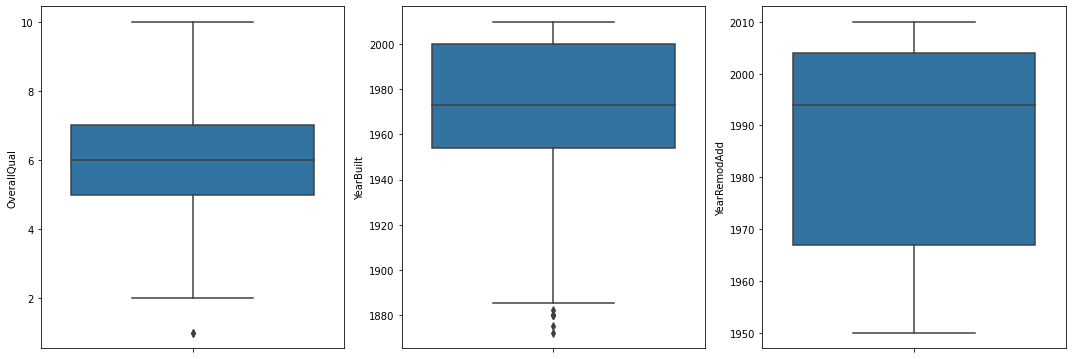

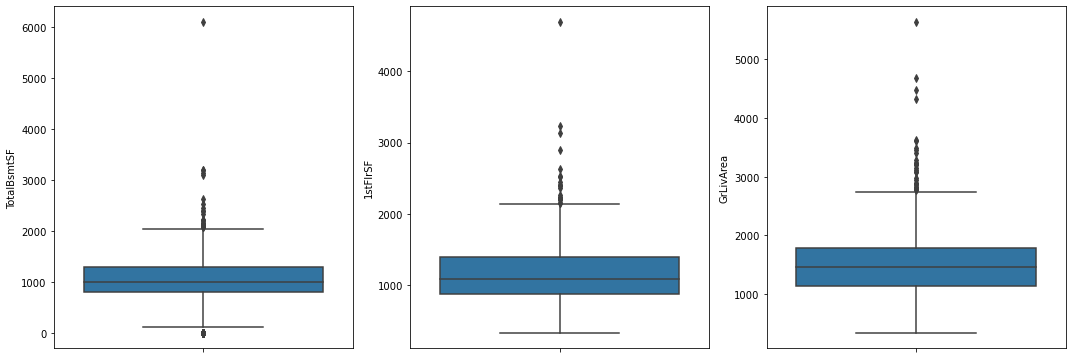

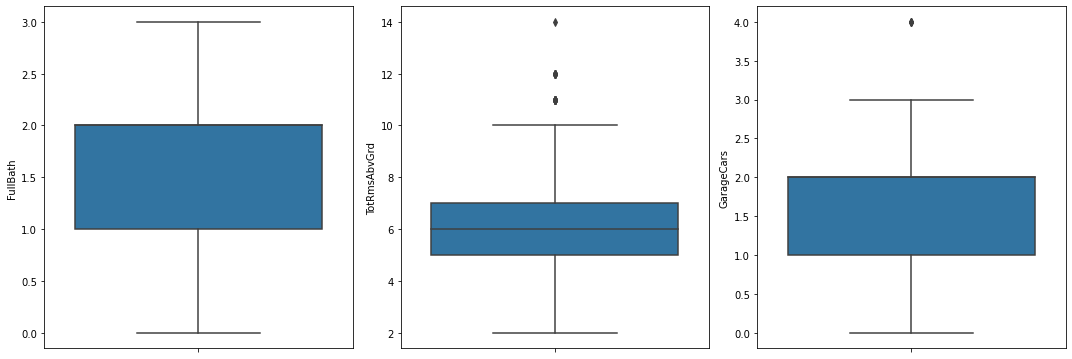

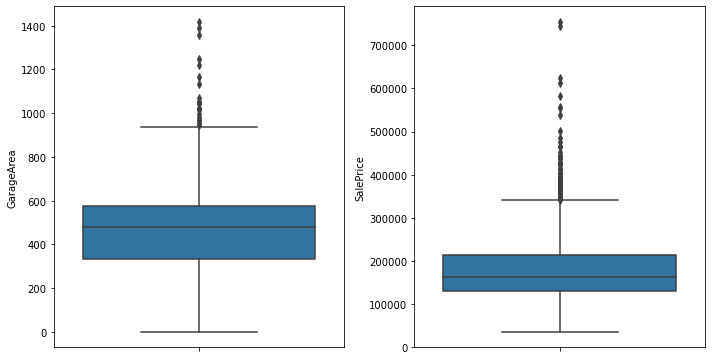

In [54]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(numeric_data.columns):
    if ix <= 3:
        ax2 = fig.add_subplot(2,3,ix+3)
        sns.boxplot(data=numeric_data, y=c, ax=ax2) #for boxplot
        fig.tight_layout()
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

#Observations:- 

 OverallQual:- The plot shows that most houses have above average rating (6). The 1st Quartile shows rating of 2 to 5. The median is 6 and 4th Quartile shows rating of 7 to 10.
 
 YearBlt:- There are outliers where house are build before 1880.  
 
 YearRemodAdd:- The plot shows more of number of houses are build in the second quartile. 
 
 SalePrice:- Here the target variable is SalePrice we can not delete the outlier.
 
 
 
 